In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host = host,
                       user = user,
                       password = pwd,
                       dbname = db)

In [4]:
#q1
sql = " select * from student "

In [5]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_7461/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [10]:
#q2
sql = """ select professor.p_name, course.c_name 
        from professor
        inner join course
        on professor.p_email = course.p_email
        """
    

In [11]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_7461/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p3,postgresql
1,p3,twitter
2,p3,facebook
3,p2,mongodb


In [12]:
#q3
sql = """
        select c_number, count(*) as num_students
        from enroll
        group by c_number
        order by num_students desc """

/tmp/ipykernel_7461/3264336175.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

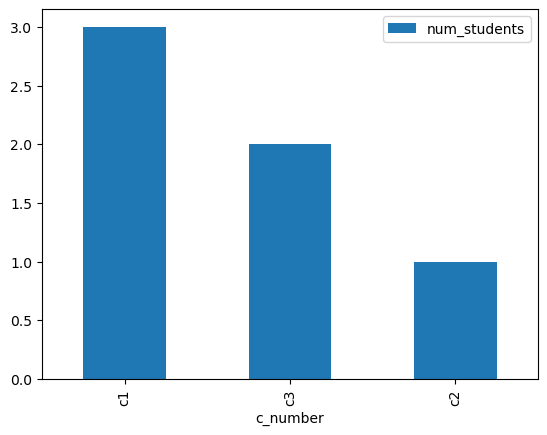

In [15]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x = 'c_number', y = 'num_students')

In [19]:
#q4
sql = """
        select professor.p_name, count(course.c_number) as num_course
        from professor
        inner join course
        on professor.p_email = course.p_email
        group by p_name
        order by num_course desc
        """

/tmp/ipykernel_7461/4005860059.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

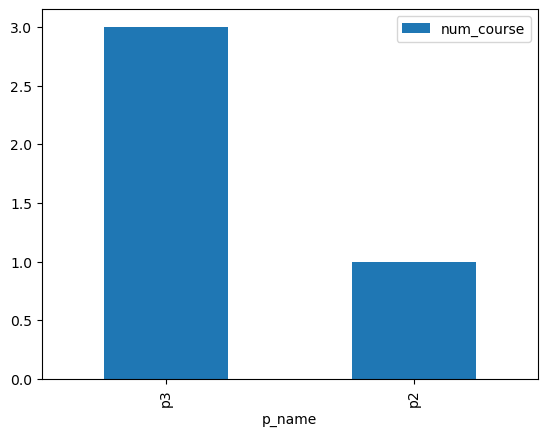

In [21]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x = 'p_name', y = 'num_course')

In [22]:
#q5
cur = conn.cursor()

In [23]:
sql = """
        insert into professor(p_email,p_name,office)
        values('p4@jmu.edu','p4','o4');
"""

In [25]:
cur.execute(sql);

In [27]:
conn.commit()

In [28]:
cur = conn.cursor()

In [29]:
sql = """
        insert into course(c_number,c_name,room,p_email)
         values('c5','linkedin','r2','p4@jmu.edu')
         """

In [30]:
cur.execute(sql);

In [31]:
conn.commit()

In [34]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_7461/2981575292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c1,postgresql,r1,p3@jmu.edu
1,c3,twitter,r1,p3@jmu.edu
2,c4,facebook,r1,p3@jmu.edu
3,c2,mongodb,r2,p2@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [35]:
#q6
cur = conn.cursor()

In [36]:
sql = """Update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'"""

In [37]:
cur.execute(sql);

In [38]:
conn.commit()

In [39]:
cur = conn.cursor()

In [40]:
sql = """delete from professor
where p_email = 'p2@jmu.edu'
"""

In [41]:
cur.execute(sql);

In [42]:
conn.commit()

In [44]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

/tmp/ipykernel_7461/2361312252.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [45]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_7461/2981575292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c1,postgresql,r1,p3@jmu.edu
1,c3,twitter,r1,p3@jmu.edu
2,c4,facebook,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu
